In [ ]:
import os
import random
import librosa
import scipy
import numpy as np
import pandas as pd
import sklearn
import seaborn
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **CARREGANDO OS ARQUIVOS**

Definindo os caminhos, localizando e armazenando os arquivos

In [ ]:
GeneralPath = "/content/drive/My Drive/Audio Dataset/"

Path1 = "/content/drive/My Drive/Audio Dataset/Kick Drum/"
Path2 = "/content/drive/My Drive/Audio Dataset/Snare Drum/"
Path3 = "/content/drive/My Drive/Audio Dataset/Claps/"
Path4 = "/content/drive/My Drive/Audio Dataset/Tom Drum/"
Path5 = "/content/drive/My Drive/Audio Dataset/Closed Hihat/"

kick_files = librosa.util.find_files(Path1, ext=['wav'])
snare_files = librosa.util.find_files(Path2, ext=['wav']) 
clap_files = librosa.util.find_files(Path3, ext=['wav']) 
tom_files = librosa.util.find_files(Path4, ext=['wav'])
clshihat_files = librosa.util.find_files(Path5, ext=['wav']) 

kick_files = np.asarray(kick_files)
snare_files = np.asarray(snare_files)
clap_files = np.asarray(clap_files)
tom_files = np.asarray(tom_files)
clshihat_files = np.asarray(clshihat_files)

print("found %d KICKS"%(len(kick_files)))  
print("found %d SNARES"%(len(snare_files)))
print("found %d CLAPS"%(len(clap_files)))
print("found %d TOMS" %(len(tom_files)))
print("found %d CLOSED HIHATS" %(len(clshihat_files)))

found 100 KICKS
found 100 SNARES
found 100 CLAPS
found 100 TOMS
found 100 CLOSED HIHATS


**librosa.load()**

- A função load do librosa carrega arquivos de áudio de entrada e os retorna como uma série de dados de ponto flutuante

- A função já normaliza os todos os dados entre -1 e 1

- sr = sampling rate, 44100 que é o sampling padrão de áudio sem perdas, valor defaut do librosa é 22050

- mono = true, converte todos os sinais stereos em 1 canal mono único

- duration = quantidade em segundo de áudio que deve ser carregado


In [ ]:
data_kicks = [] 
data_snares = []
data_claps = []
data_toms = []
data_clshihat = []

for y in kick_files: 
    audio, sr = librosa.load(y, sr = 44100, mono = True, duration = 1)
    data_kicks.append(audio)
for y in snare_files: 
    audio, sr = librosa.load(y, sr = 44100, mono = True, duration = 1)
    data_snares.append(audio)
for y in clap_files: 
    audio, sr = librosa.load(y, sr = 44100, mono = True, duration = 1)
    data_claps.append(audio)
for y in tom_files: 
    audio, sr = librosa.load(y, sr = 44100, mono = True, duration = 1)
    data_toms.append(audio)
for y in clshihat_files: 
    audio, sr = librosa.load(y, sr = 44100, mono = True, duration = 1)
    data_clshihat.append(audio)

# **PREVIEW DOS DADOS**

- KICK DRUM

In [ ]:
ipd.Audio(kick_files[0])

- SNARE DRUM

In [ ]:
ipd.Audio(snare_files[2])

- CLAP

In [ ]:
ipd.Audio(clap_files[0])

- TOM DRUM

In [ ]:
ipd.Audio(tom_files[0])

- CLOSED HIHAT

In [ ]:
ipd.Audio(clshihat_files[0])

 - VISUALIZANDO ARQUIVOS

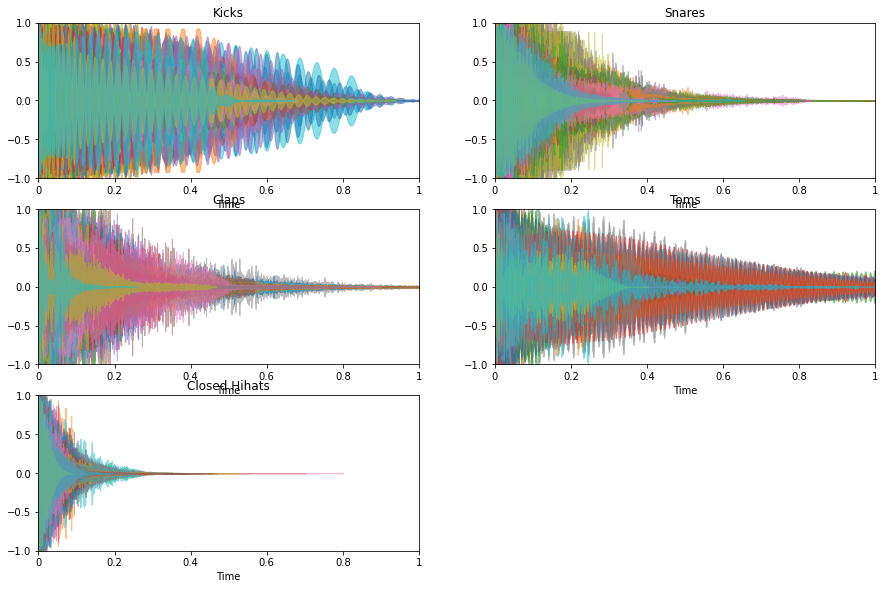

In [ ]:
plt.figure(figsize=(15, 20))

ax = plt.subplot(6, 2, 1)
for z in data_kicks:
    librosa.display.waveplot(z, alpha=0.5)
    plt.ylim((-1, 1))
    plt.xlim((0, 1))
    plt.title("Kicks")

ax = plt.subplot(6, 2, 2)
for z in data_snares:
    librosa.display.waveplot(z, alpha=0.5)
    plt.ylim((-1, 1))
    plt.xlim((0, 1))
    plt.title("Snares")

ax = plt.subplot(6, 2, 3)
for z in data_claps:
    librosa.display.waveplot(z, alpha=0.5)
    plt.ylim((-1, 1))
    plt.xlim((0, 1))
    plt.title("Claps")

ax = plt.subplot(6, 2, 4)
for z in data_toms:
    librosa.display.waveplot(z, alpha=0.5)
    plt.ylim((-1, 1))
    plt.xlim((0, 1))
    plt.title("Toms")

ax = plt.subplot(6, 2, 5)
for z in data_clshihat:
    librosa.display.waveplot(z, alpha=0.5)
    plt.ylim((-1, 1))
    plt.xlim((0, 1))
    plt.title("Closed Hihats")

# **EXTRAÇÃO DE FEATURES**

SEGEMENTAÇÃO
- Dividir e analisar cada áudio em frames de tempo
- Definir limite máximo de duração de 1s para todos os arquivos 

In [ ]:
FRAME_SIZE = 1024 #o número de samples da janela de análise
HOP_LENGTH = 512  #o número de samples da janela intermediária que se repete entre os sucessivos frames

In [ ]:
def extract_features(audiodata, FRAME_SIZE, HOP_LENGTH):
    amp_ft = []
    rms_ft = []
    zcr_ft = []  

    for x in audiodata:
        #Amplitude envelope
        amp = np.array([max(x[i:i+FRAME_SIZE]) for i in range(0, len(x), HOP_LENGTH)])
        amp_mean = np.mean(amp)
        #Root-mean square
        rms = librosa.feature.rms(x, frame_length = FRAME_SIZE , hop_length = HOP_LENGTH)
        rms_mean = np.mean(rms)
        #Zero-Crossing Rate 
        #zcr = librosa.feature.zero_crossing_rate(x + 0.0001, frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)
        zcr_ntimes = sum(librosa.zero_crossings(x, pad=False))

        amp_ft.append(amp_mean)
        rms_ft.append(rms_mean)
        zcr_ft.append(zcr_ntimes)

    #Normalizando ZCR
    #zcr_ft2 = np.array(zcr_ft)  
    #zcr_nrmlzd = (zcr_ft2 - zcr_ft2.min()) / (zcr_ft2.max() - zcr_ft2.min())
   
    return[np.array(amp_ft), np.array(rms_ft), np.array(zcr_ft)]

- Extraindo Features dos KICKS

In [ ]:
amp_kick = []
rms_kick = []
zcr_kick = []
amp_kick, rms_kick, zcr_kick = extract_features(data_kicks, FRAME_SIZE, HOP_LENGTH)

- Extraindo Features dos SNARES

In [ ]:
amp_snare = []
rms_snare = []
zcr_snare = []
amp_snare, rms_snare, zcr_snare = extract_features(data_snares, FRAME_SIZE, HOP_LENGTH)

- Extraindo Features dos CLAPS

In [ ]:
amp_clap = []
rms_clap = []
zcr_clap = []
amp_clap, rms_clap, zcr_clap = extract_features(data_claps, FRAME_SIZE, HOP_LENGTH)

 - Extraindo Features dos TOMS

In [ ]:
amp_tom = []
rms_tom = []
zcr_tom = []
amp_tom, rms_tom, zcr_tom = extract_features(data_toms, FRAME_SIZE, HOP_LENGTH)

 - Extraindo Features dos CLOSED HIHATS

In [ ]:
amp_clshihat = []
rms_clshihat = []
zcr_clshihat = []
amp_clshihat, rms_clshihat, zcr_clshihat = extract_features(data_clshihat, FRAME_SIZE, HOP_LENGTH)

#**CONCATENANDO FEATURES**

**CLASSES:**
- Kick = '0'
- Snare = '1'
- Clap = '2'
- Tom = '3'
- Closed Hihat = '4'

**TIPOS DE FEATURES:**
1. *Valores Discretos* = **Zero-Crossing Rate**, Número de vezes que o sinal atravessa o valor zero por causa de uma oscilação
2. *Valores Contínuos* = **Root-Mean Square**, Valores médios de um sinal
3. *Valores Contínuos* = **Amplitude Envelope**, Valores máximos que representam os picos do sinal
4. *Valores Categóricos Ordinais* = **Low = 0/Mid = 0.5/High = 1**, Localização e faixa de alcance no domínio da frequência
5. *Valores Categóricos Ordinais* = **Fast = 0/ Slow = 1**, parâmetro que avalia o quão rápido o sinal decai  
6. *Valores Categóricos Nominais* = **Synthesized = 0/ Acoustic = 0.5/ Natural = 1**, Fonte sonora proveniente, se foi sintetizada, gerado de um instrumento ou uma fonte natural

In [ ]:
all_features = []

for i in range(len(kick_files)):
    all_features.append([amp_kick[i], rms_kick[i], zcr_kick[i], 'Low', 'Slow', 'Synthesized', 'KICK'])
for i in range(len(snare_files)):
    all_features.append([amp_snare[i], rms_snare[i], zcr_snare[i], 'Mid', 'Fast', 'Acoustic', 'SNARE'])
for i in range(len(clap_files)):
    all_features.append([amp_clap[i], rms_clap[i], zcr_clap[i], 'Mid', 'Fast', 'Natural', 'CLAP'])
for i in range(len(tom_files)):
    all_features.append([amp_tom[i], rms_tom[i], zcr_tom[i], 'Low', 'Slow', 'Acoustic', 'TOM'])
for i in range(len(clshihat_files)):
    all_features.append([amp_clshihat[i], rms_clshihat[i], zcr_clshihat[i], 'High', 'Fast', 'Acoustic', 'CLS HIHAT'])

In [ ]:
all_ft = np.array(all_features)

In [ ]:
all_ft.shape

(500, 7)

In [ ]:
all_ft[:10]

array([['0.5045454', '0.36726484', '154', 'Low', 'Slow', 'Synthesized',
        'KICK'],
       ['0.2778165', '0.20587227', '1783', 'Low', 'Slow', 'Synthesized',
        'KICK'],
       ['0.372127', '0.2720401', '35', 'Low', 'Slow', 'Synthesized',
        'KICK'],
       ['0.41519433', '0.32503214', '436', 'Low', 'Slow', 'Synthesized',
        'KICK'],
       ['0.24149981', '0.18238968', '66', 'Low', 'Slow', 'Synthesized',
        'KICK'],
       ['0.38758922', '0.24282892', '58', 'Low', 'Slow', 'Synthesized',
        'KICK'],
       ['0.28693736', '0.20719776', '47', 'Low', 'Slow', 'Synthesized',
        'KICK'],
       ['0.6197219', '0.4619862', '135', 'Low', 'Slow', 'Synthesized',
        'KICK'],
       ['0.5840009', '0.41662398', '57', 'Low', 'Slow', 'Synthesized',
        'KICK'],
       ['0.64396787', '0.49080443', '107', 'Low', 'Slow', 'Synthesized',
        'KICK']], dtype='<U32')

Apagando Alguns Valores

In [ ]:
all_ft[92][0] = np.nan
all_ft[145][1] = np.nan 
all_ft[234][2] = np.nan 
all_ft[346][3] = np.nan
all_ft[461][4] = np.nan 

# **SALVANDO DATASET**

In [ ]:
audio_dataset = pd.DataFrame(all_ft)
audio_dataset.to_csv('/content/drive/My Drive/Audio Dataset/timeaudiofeatures1.csv', index = False,header=["AMP", "RMS", "ZCR", "FREQ. RANGE", "TIME DECAY", "SOURCE","CLASS"])

PCA EXAMPLE

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


def get_pca(features):
    pca = PCA(n_components=2)
    transformed = pca.fit(features).transform(features)
    scaler = MinMaxScaler()
    scaler.fit(transformed)
    return scaler.transform(transformed)
  

my_array_of_feature_vectors = ...
scaled_pca = get_pca(my_array_of_feature_vectors)
  